This project is a part of internship program offered to me by **CODSOFT** for their 4 week internship program. This is Task 1 of the internship program.

Name: Chirag

University: Chandigarh University

**Step 1: Importing the required libraries**

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


**Step 2: Importing data saved as csv file**

In [137]:
titanic_data = pd.read_csv(r"tested.csv")

In [138]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Step 3: Get each and every details of the data**

1. Check number of rows and column in the dataset.
2. Getting the data types of every column
3. To check is there any null values in the dataset

In [139]:
titanic_data.shape

(418, 12)

In [140]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [141]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**Step 4: Data Pre-processing**

1. Removing or cleaning dataset with null values.
2. Decribing dataset.
3. Making data ready for analysis and visualization.

In [142]:
#Note that there are lot of null values in cabin dataset.
#So it is better to remove that column.
titanic_data = titanic_data.drop(columns="Cabin", axis = 1)

In [143]:
#Also there is column of no use.
#Drop the column ticket, SibSp, Parch from the dataset
titanic_data = titanic_data.drop(columns="Ticket", axis = 1)
titanic_data = titanic_data.drop(columns="Name", axis = 1)
# titanic_data = titanic_data.drop(columns="PassengerId", axis = 1)

In [144]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S


In [145]:
#Now in both age and fare, there are limited null values, 
#So we will replace the null values with average values of the dataset.
titanic_data["Age"].fillna(titanic_data["Age"].mean(), inplace=True)
titanic_data["Fare"].fillna(titanic_data["Fare"].mean(), inplace=True)

In [146]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S


In [147]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [148]:
#Our data does not contain any null values now.
#Now we will describe the data and get simple results like mean, median, etc.
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [149]:
#Now, we will check about target variable, number of people survived or died in dataset.
titanic_data["Survived"].value_counts()

0    266
1    152
Name: Survived, dtype: int64

**Note:**

1. We have cleaned the data and now it is ready for vizualization and Analysis.
2. We have removed the unnecessary columns and in necessary columns, replace the null values with the average values.

**Step 5: Data vizualization**

1. Visualize the data based on gender.
2. Visualize the data based on number of people survived.
3. Visualize the data based on age.
4. Visualize the data based on their category of boarding.
5. Visualize the data based on Embarked i.e. location from where passengers are mounted from.

<AxesSubplot: xlabel='Sex', ylabel='count'>

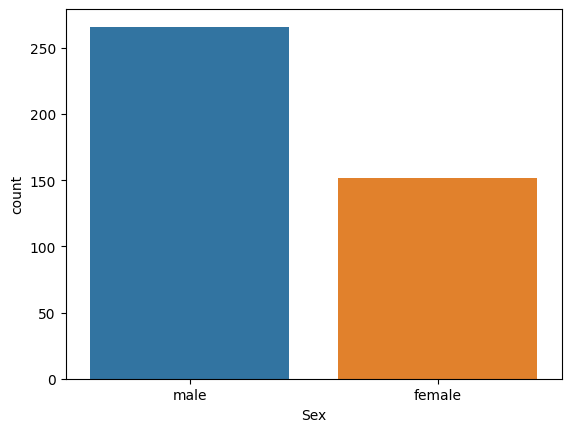

In [150]:
#Visualization 1: Number of males and females on the Titanic
sns.countplot(x ='Sex', data = titanic_data )

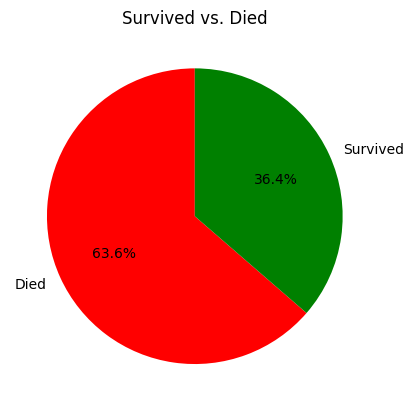

In [151]:
#Visualization 2: Number of people Survived on the Titanic
survived_counts = titanic_data['Survived'].value_counts()
labels = ['Died', 'Survived']
sizes = survived_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title("Survived vs. Died")
plt.show()

<AxesSubplot: xlabel='Sex', ylabel='count'>

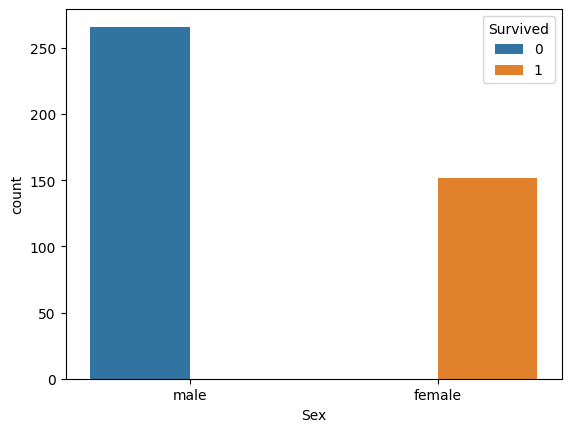

In [152]:
#Visualization 2: Number of MALES AND FEMALES Survived on the Titanic
sns.countplot(data=titanic_data, x='Sex', hue='Survived')


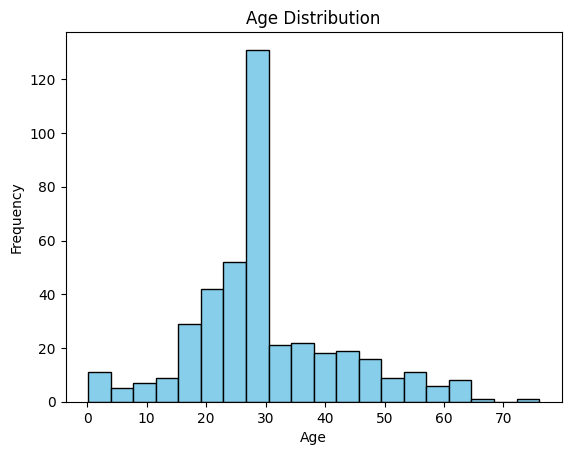

In [153]:
#Note that the above visualization shows that all female survived vs all male died on titanic.
#Visualization 4: People Survived on the Titanic based on age
plt.hist(titanic_data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot: xlabel='Pclass', ylabel='count'>

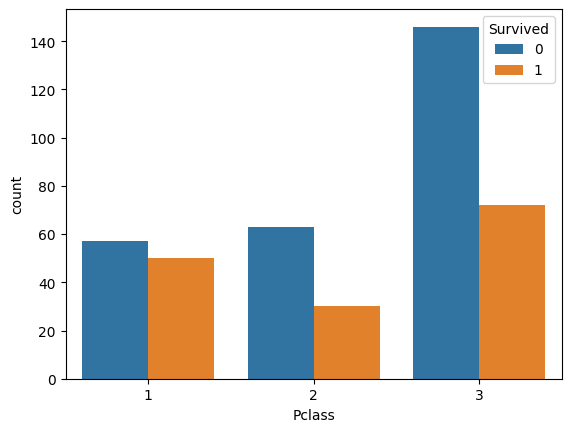

In [154]:
#Visualization 5: People Survived on the Titanic based on age
sns.countplot(data=titanic_data, x='Pclass', hue='Survived')

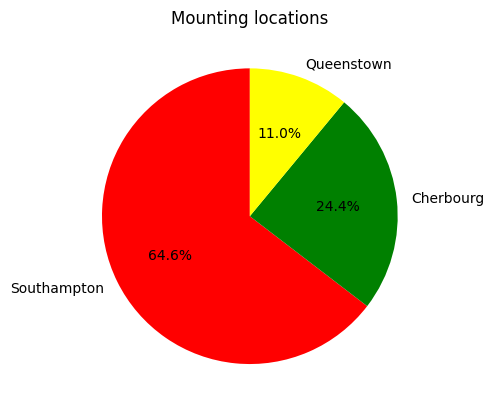

In [155]:
#Visualization 6: People mounting from various locations on Titanic
Embarked_counts = titanic_data['Embarked'].value_counts()
labels = ['Southampton', 'Cherbourg', 'Queenstown']
sizes = Embarked_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'yellow'])
plt.title("Mounting locations")
plt.show()

Text(0.5, 1.0, 'Fare Distribution')

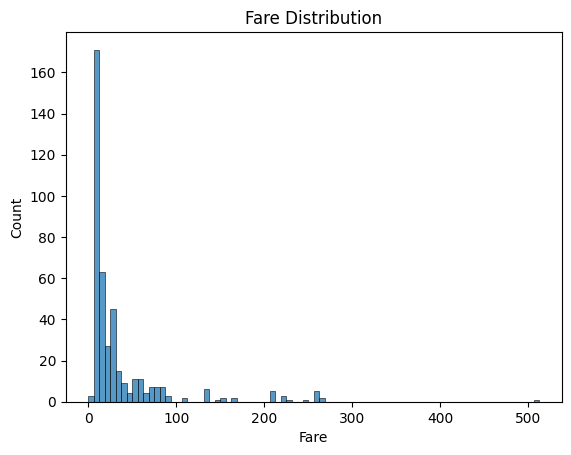

In [156]:
#Visualization 7: Showing fare prices for person on titanic
sns.histplot(titanic_data['Fare'])
plt.title('Fare Distribution')


In [157]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S


In [158]:
#In this last step before building prediction model, 
#We will convert Sex and Embarked into numerical values.
from sklearn.preprocessing import LabelEncoder
columns = ['Sex', 'Embarked']
le = LabelEncoder()
for column in columns:
    titanic_data[column] = le.fit_transform(titanic_data[column])
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.5,0,0,7.8292,1
1,893,1,3,0,47.0,1,0,7.0000,2
2,894,0,2,1,62.0,0,0,9.6875,1
3,895,0,3,1,27.0,0,0,8.6625,2
4,896,1,3,0,22.0,1,1,12.2875,2


In [159]:
#Here, 0 - Female and 1 - Male
#And, 0 - Cherbourg(C), 1 - Queenstown(Q), 2 - Southampton(S)

**Step 6: Creating prediction Model**

1. Split the data in terms of independent variable and dependent variable.  
2. Split the data into training and testing data
3. Train the model using Linear regression
4. Check accuracy

In [160]:
#Step 1: Splitting data into independent and dependent variable
X = titanic_data.drop(columns = ['Survived'],axis=1)
Y = titanic_data['Survived']

In [161]:
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [162]:
Y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [163]:
#Step 2: Splitting the data into training and testing data set.
#We know best split method is 80 - 20 rule.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=2)

In [164]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
109,1001,2,1,18.5,0,0,13.0000,2
231,1123,1,0,21.0,0,0,26.5500,2
321,1213,3,1,25.0,0,0,7.2292,0
398,1290,3,1,22.0,0,0,7.7750,2
13,905,2,1,63.0,1,0,26.0000,2


In [165]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
146,1038,1,1,30.27259,0,0,51.8625,2
223,1115,3,1,21.00000,0,0,7.7958,2
193,1085,2,1,61.00000,0,0,12.3500,1
305,1197,1,0,64.00000,1,1,26.5500,2
188,1080,3,0,30.27259,8,2,69.5500,2


In [166]:
Y_train.head()

109    0
231    1
321    0
398    0
13     0
Name: Survived, dtype: int64

In [167]:
Y_test.head()

146    0
223    0
193    0
305    1
188    1
Name: Survived, dtype: int64

In [168]:
#Step 3: Linear Regression Model

#Import libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Create a model
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [169]:
#Step 4: Evaluate and compare results for train and test data
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

r2_train = r2_score(Y_train, Y_train_pred)
r2_test = r2_score(Y_test, Y_test_pred)

print("R-squared on Training Data:", r2_train)
print("R-squared on Testing Data:", r2_test)

R-squared on Training Data: 1.0
R-squared on Testing Data: 1.0


## Hence our data is now transformed in a prediction model as we have tested the dataset and checked for accuracy.

In [170]:
#Converting model into prediction model

In [171]:
from joblib import dump, load
dump(model, 'main.joblib')

['main.joblib']